# Introduction

In old times, photos are in greyscale due to the limitation of technology. It is a pity that we could not view the history in a colorful way.

Image colorization is a process to assign colors to grayscale images to make them more aesthetically appealing and perceptually meaningful.
There are some communities who are devoted to color black and white photos, but it takes up to a month for a person to complete coloring one single image.

Deep learning greatly reduces the cost and time in image colorization. Well-trained models have the ability to capture and use semantic information in colorization and produce decent results in seconds.

For the final project, I deep into the colorization problem. I collect over 20,000 landscape images and apply CNN, autoencoder and Unet and the best model produces decent results.

# Related Work

In recent years, researchers have sought deep learning for help to automatically color greyscale images and achieved promising results.

“Colorful Image Colorization”[1] is one of the first and most well-known attempts to colorize greyscale images using deep learning. The team aimed to predict a, b channels of images given the lightness channel L in the CIE Lab colorspace. They trained a convolutional neural network on a large dataset to map from a grayscale image to a distribution over quantized
color value outputs using the architecture shown in figure below. Instead of using L2 loss which is not preferred because of the ambiguity of the problem, the team treats the problem as classification and applies cross entropy loss. The output images successfully fool participants on 32% of trials.

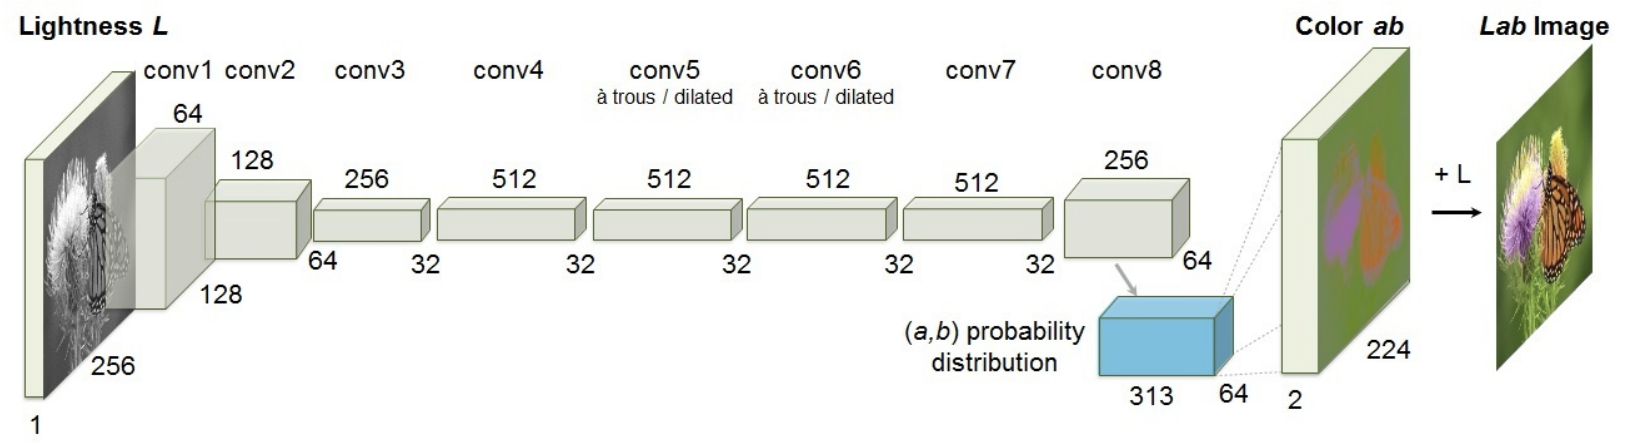

“Deep Koalarization: Image Colorization using CNNs and Inception-Resnet-v2”[2] combines CNN from scratch and pre-trained model ResNet and train an encoder-decoder model. The fusion layer merges outputs from encoder and feature extractor and passes it to the decoder for the prediction. The model is trained on 60,000 original images and the best results fooled participants on 45.87% of trials.

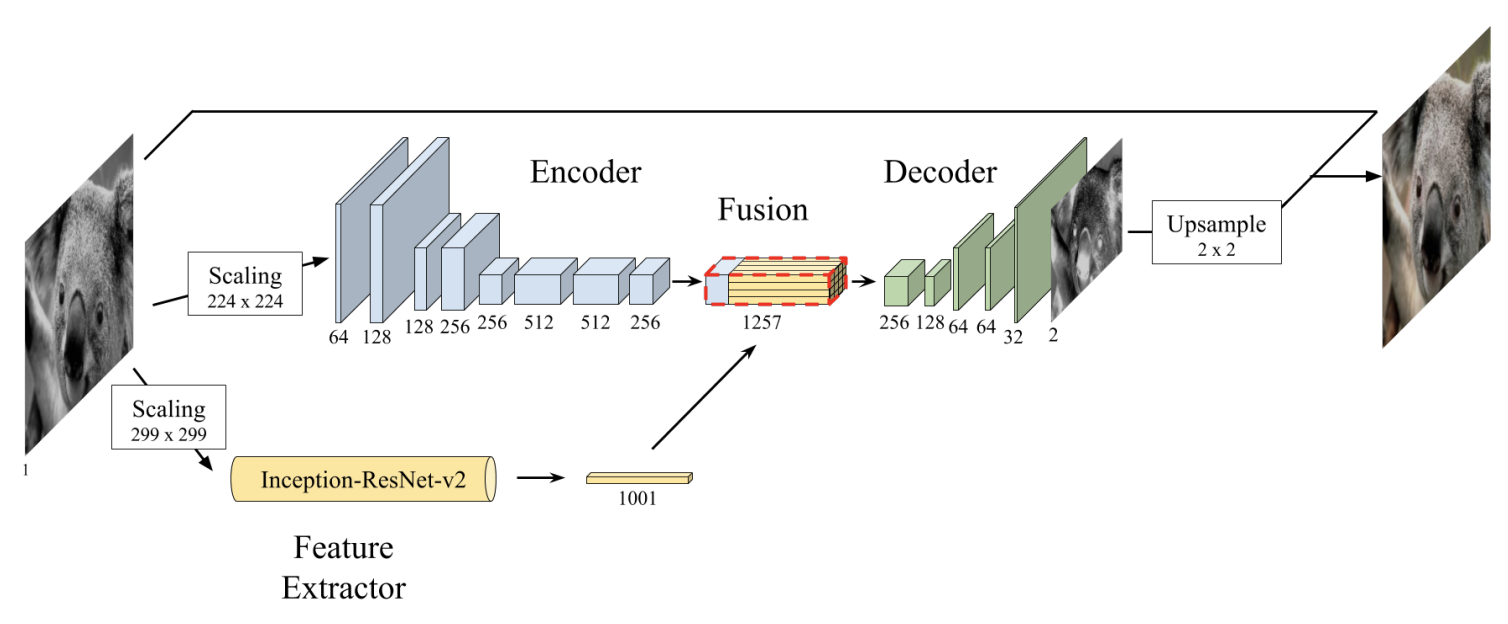

More recent researches such as “Remote sensing image colorization using symmetrical multi-scale DCGAN in YUV color space”[3] are based on deep convolution generation adversarial network. The generator is a symmetrical structure and the discriminator uses residual neural network. The model is trained on 11200 images and achieves superior results in remote sensing image colorization.

More attempts can be found in “Image Colorization: A Survey and Dataset”[4] , which is a survey paper that present recent state-of-the-art deep learning-based image colorization techniques.

# Dataset

Image colorization problem usually requires a large dataset and the model is expected to trained for days with GPU to achieve promising results. Due to the limitation of time and resources, I decided to simplify the problem by only focusing on landscape images.

I collect 22,760 landscape images in total for image colorization. 3,024 images are crawled from google using keywords such as beach, cliff and so on. The rest are collected from different kaggle dataset: 

1. 4,671 weather images from [5]
2. 10,745 landmark images from [6]
3. 4,320 landscape images from [7]

I manually remove low-quality, irrelavent and redundant images to clean the dataset. All images are centered and cropped to 256*256. The data are randomly shuffled and split into train:validation:test = 8:1:1. The below figure shows some sample images.



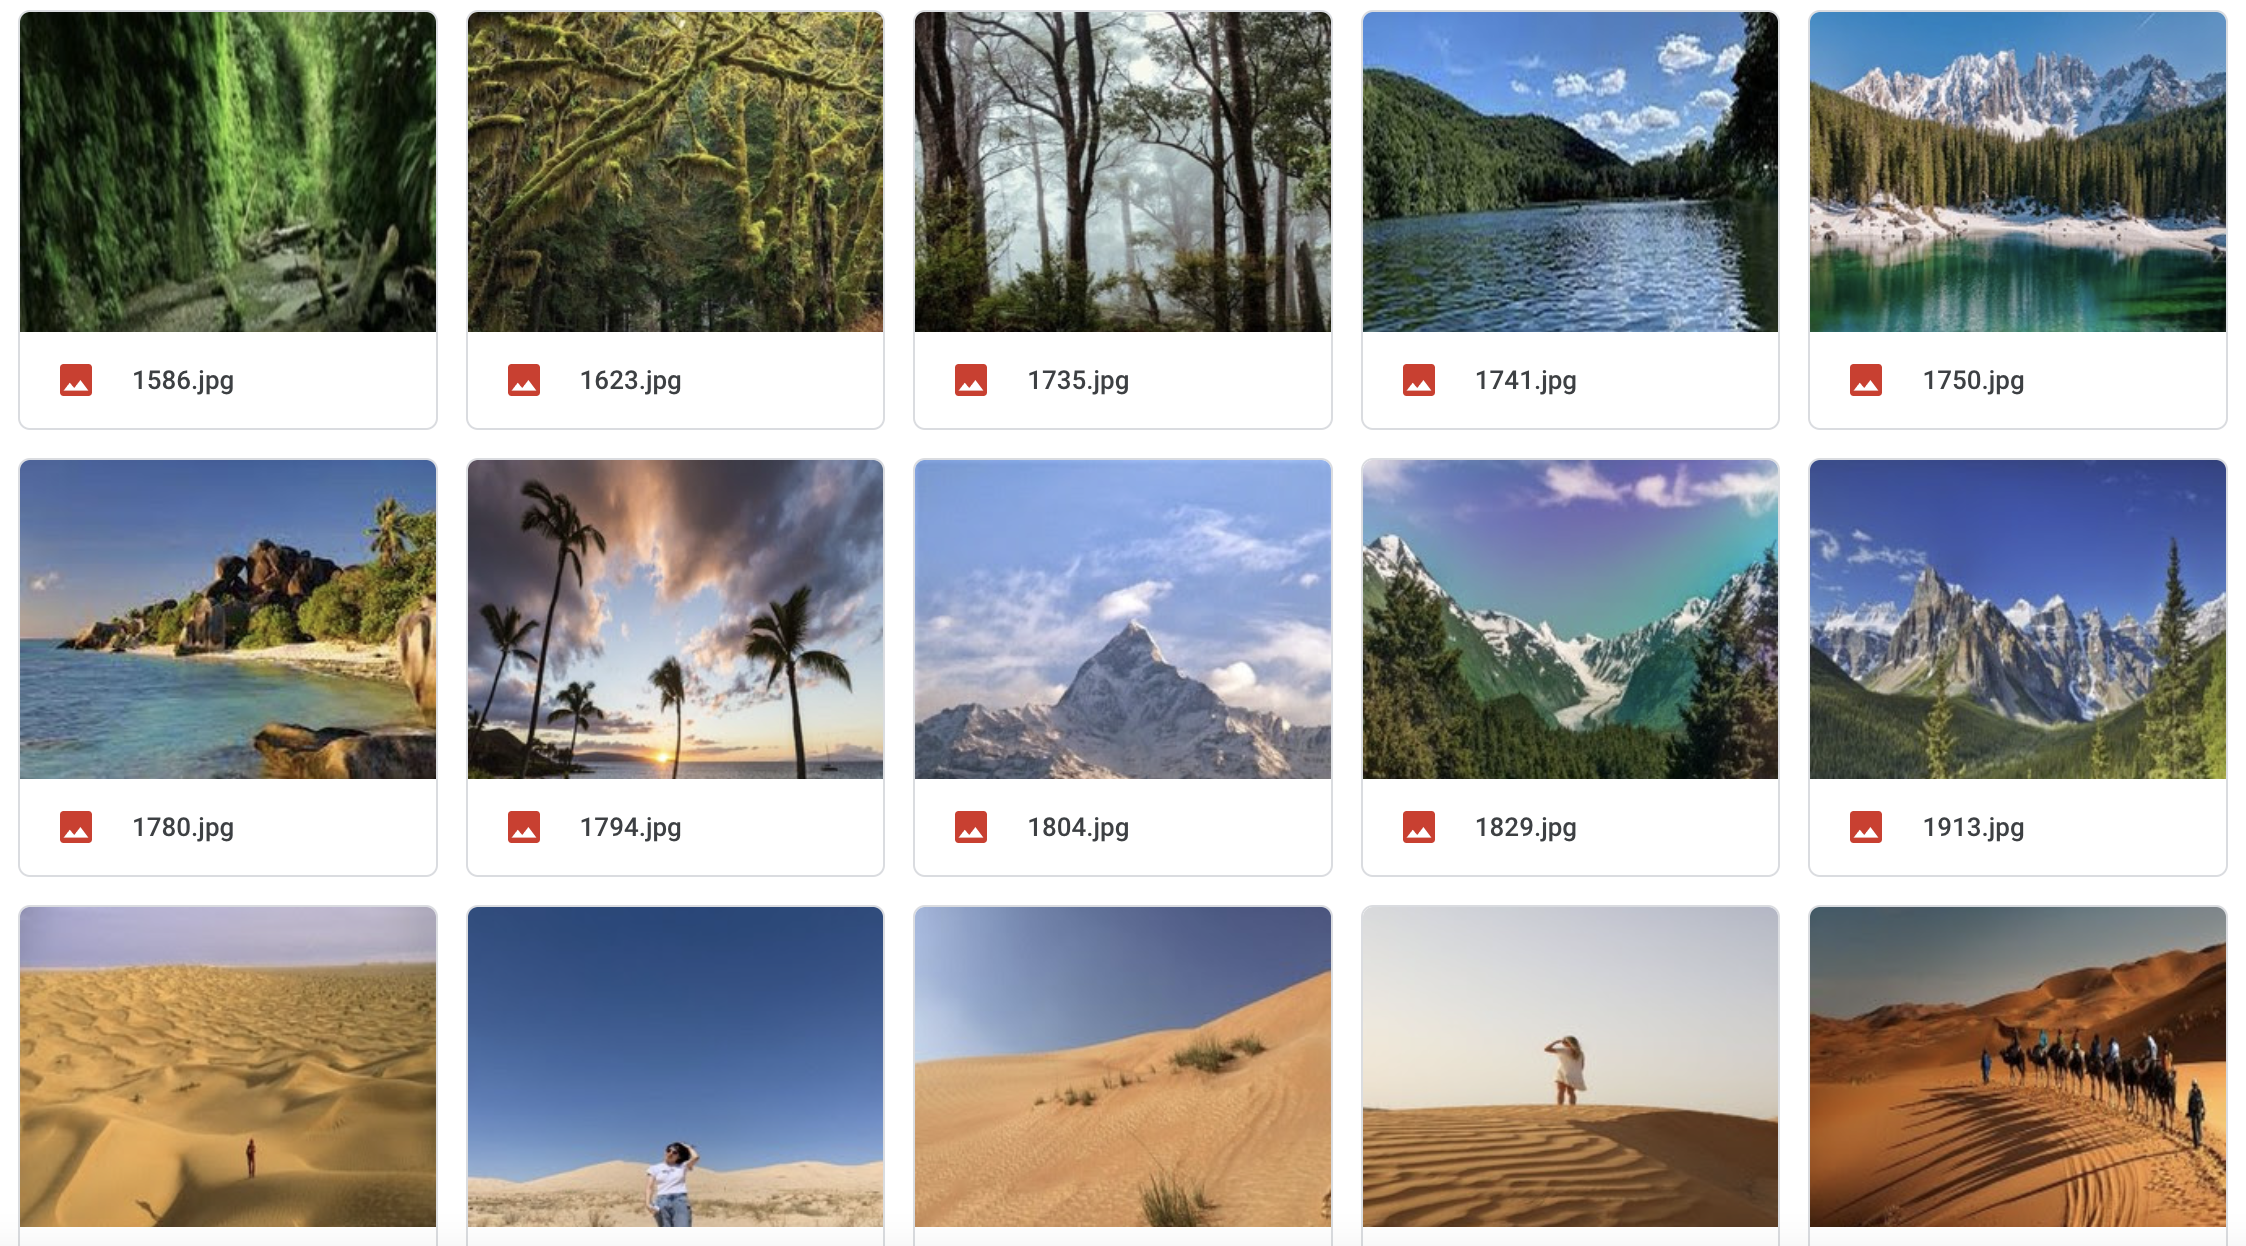

# Methods

## Key idea

The images are converted into CIE Lab color space which is a 3-axis color system with dimension L for lightness and a and b for the color spectra green–red and blue–yellow. L channel (greyscale channel) is used as the input to the model and the 2 output channels are predictions for the ab channels.



To improves the performance and training stability of the model, I center and rescale all values in three channels to obtain values within the interval of [−1, 1].

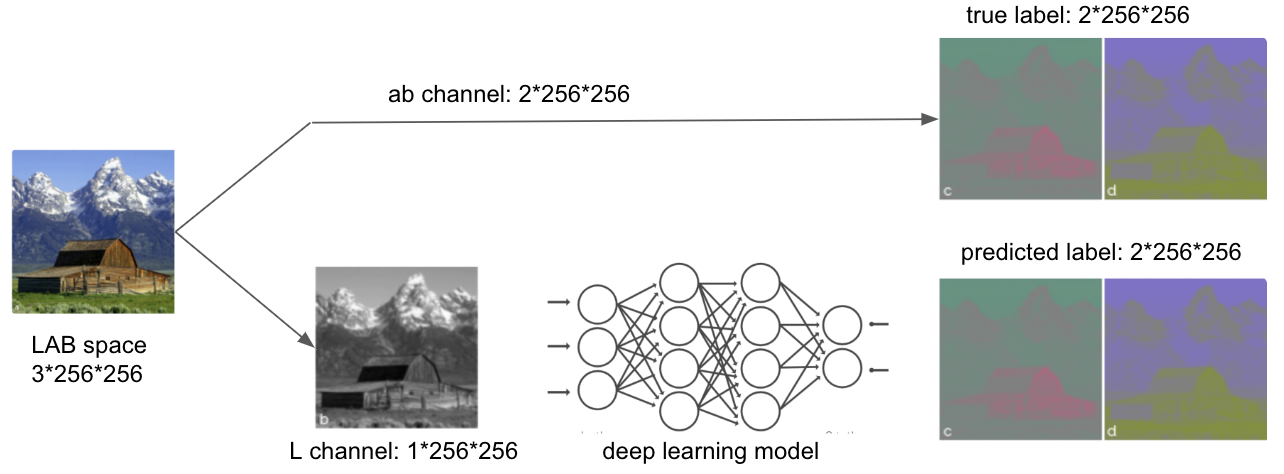

## CNN from scratch

The first model I try is to implement a convolutional neural network from scratch. The plot below illustrates the architecture of the model. Each block is composed of a convolutional layer followed by a relu layer and a batchnorm layer. The filter is of size 4\*4 with stride 2\*2 and padding 1\*1 to downsize images by half and of size 3*3 to remain the same size. I use upsampling layer to keep the output image of the same size as that of the input.

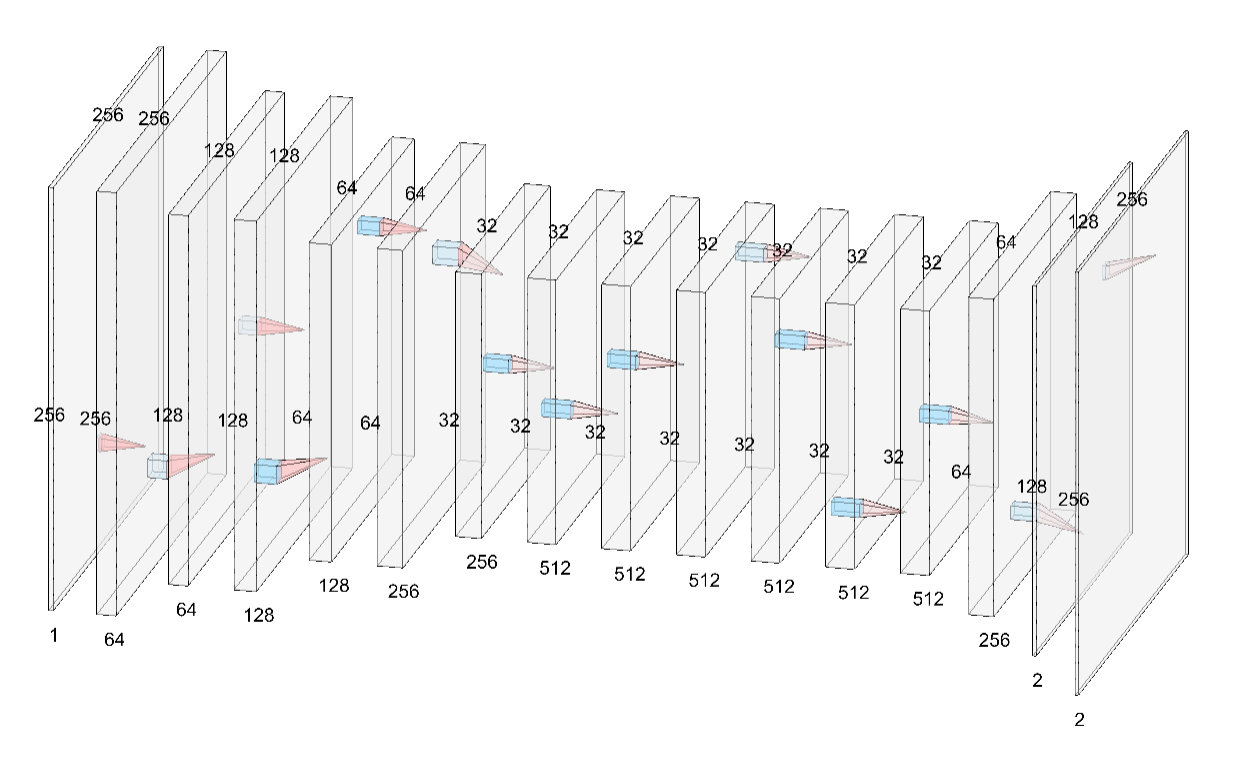

However, after I try different loss functions, optimizers with different learning rates, the results are still very poor.
There are multiple possible problems leading to this including:
1. The model is not deep enough to capture the information of the image for colorization. 
2. The dataset is relatively small compared to dataset used in image colorization papers.
3. Colab has limit on GPU usage which prohibits me from training long enough.

If I simply increase the complexity of the model, it would require longer time of training with larger dataset which is disencounraged given the limitation in resource and time. Therefore, I decided to use transfer learning.


## Autoencoder with ResNet18 as encoder

Autoencoder (as show in the figure below [8]) is a robust model in generation problems. It aims to learn the underlying representations of the inputs by performing dimension reduction. 

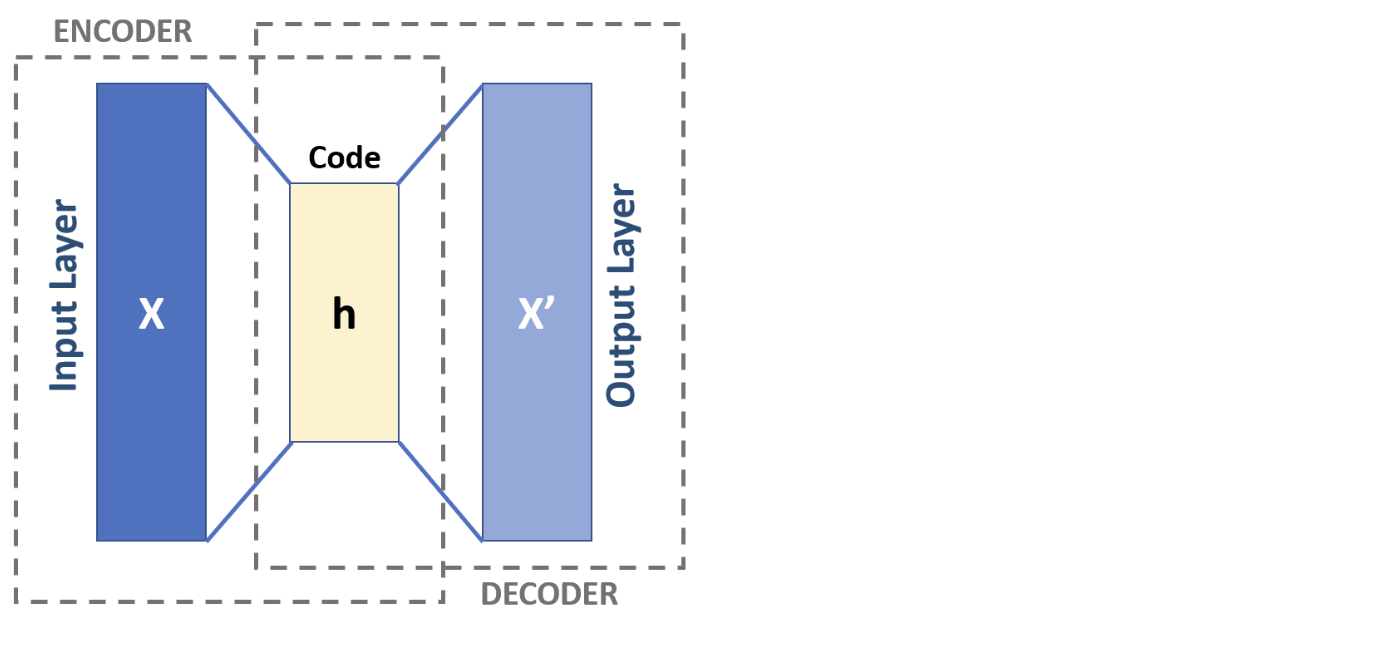

I use pretrain ResNet18 as encoder. The first layer of ResNet18 is reshaped to accept single-channel input. Only the first 6 layers are kept and the rest are truncated. The decoder is composed of a few convolutional block. Each block is composed of one convolutional layer followed by ReLu and batchNorm. The output size is kept as 256\*256 through upsampling layers.

The below figure shows a few sample outputs from test dataset. The model is able to identify the sky and colors it blue, but the rest part of images remain grey. It indicates that this model is still not complex enough to capture all information in the greyscale inputs.

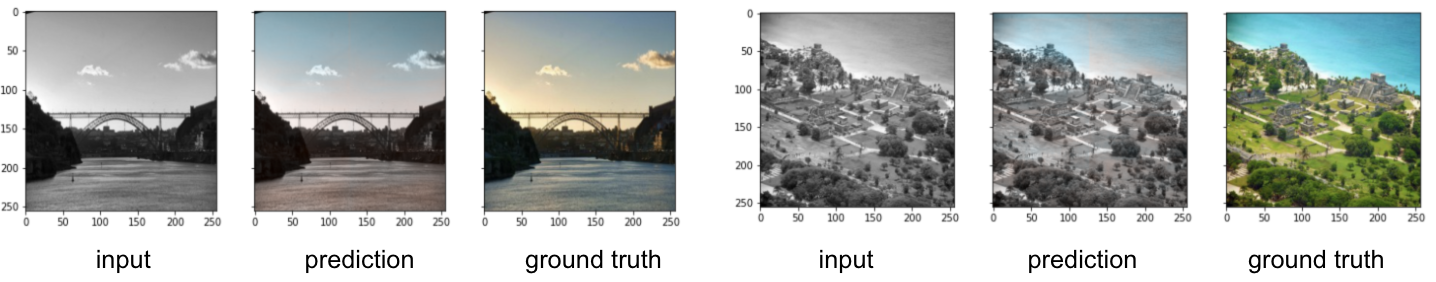

## Unet with ResNet Backbone

Unet (as shown in the figure below [9]) contains contraction and expansion parts. Expansion parts include expansion block concatenated with the corresponding cropped feature map from the contracting path. It is a robust model that has been proved successful in many applications.

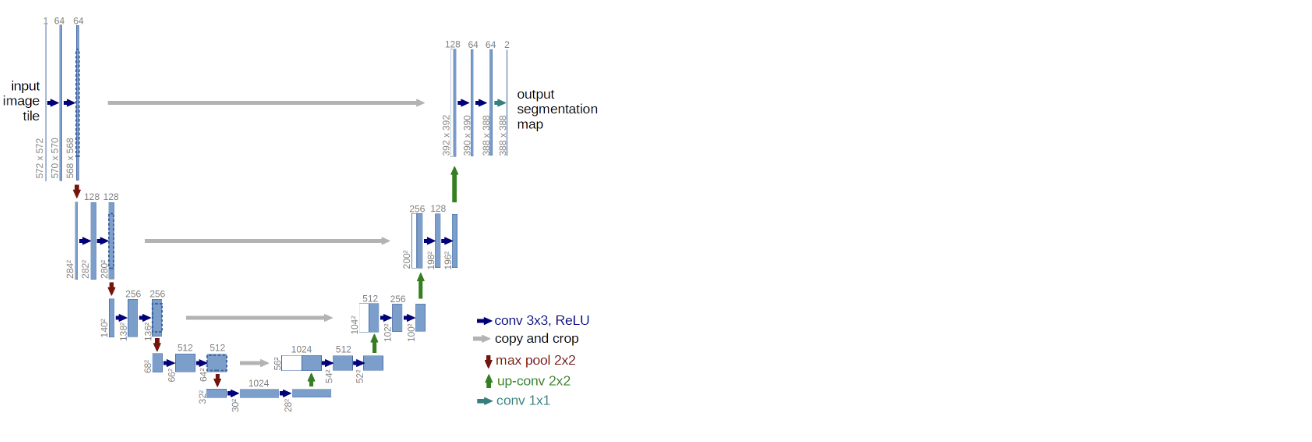

I use ResNet18 as backbone, Adam as optimizer, L1 loss as loss function. After training for 10 epochs with learning rate = 0.0001, the model is able to produce decent results as shown below.

---



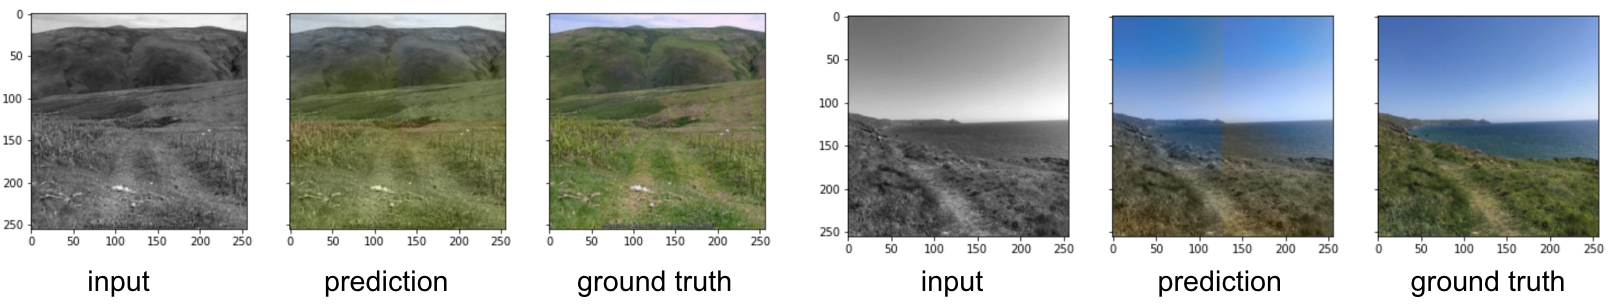

To analysis whether ResNet18 is complex enough for the image colorization problem, I try more complex model ResNet34 as backbone with the same optimizer, loss function and learning rate. In addition, I use L2 loss for the same setting to see the effects of loss function. The training and validation loss for two unet models and the autoencoder, and a sample image from Unet are shown below for comparison.

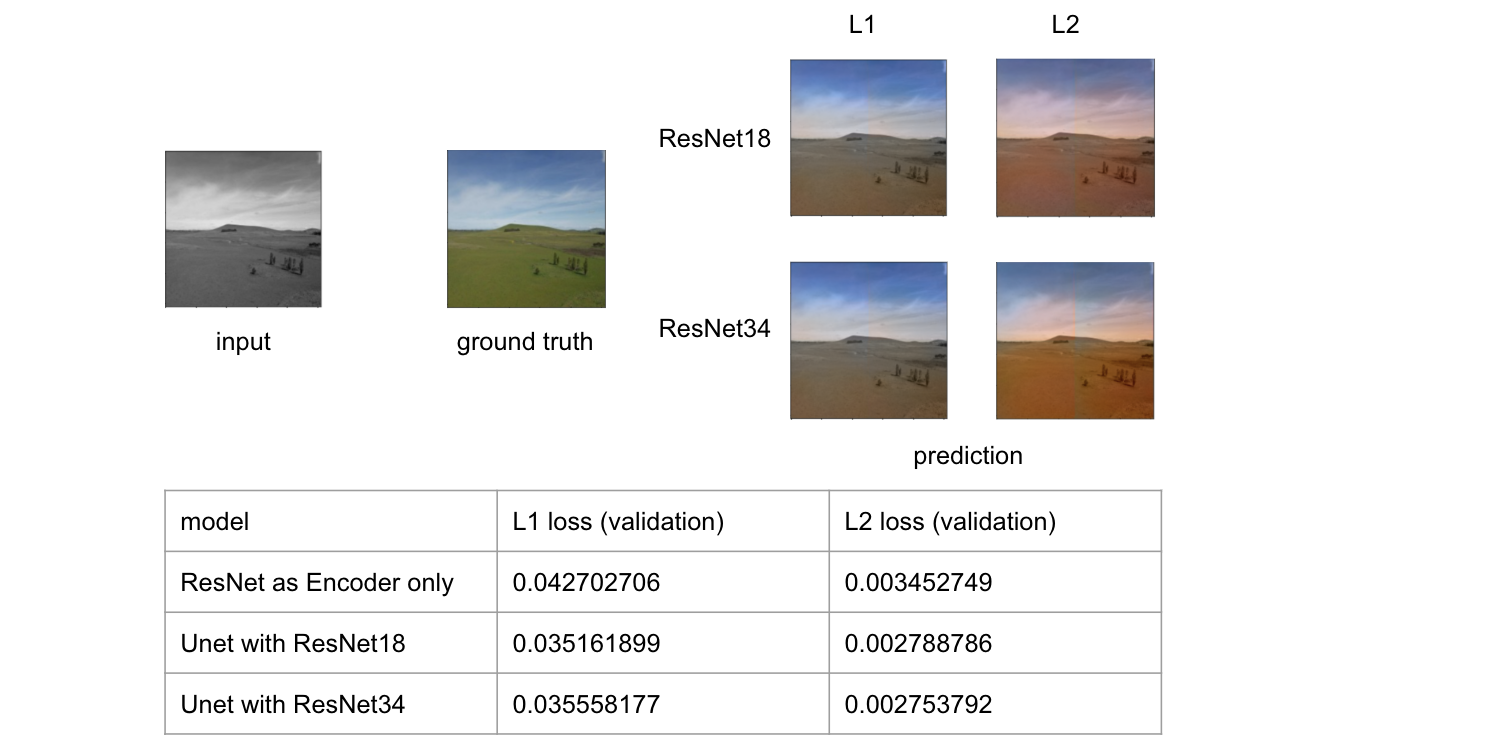

As shown in the figure and in the table, all combinations of Unet produce good results and outperform autoencoder. L1 loss is preferred over L2 loss because l2 loss tends to be too conservative and produces more gray-ish images. Unet with two different ResNet backbone models are almost identical so ResNet18 is complex enough for this problem.

# Experiments

I train Unet with ResNet18 Backbone with L1 loss for 40 epochs. The learning rate for the first 10 epochs is 0.0001 and is 0.00002 for the rest. The best validation loss is 0.03366398. The below figure shows a few coloring images in the test set with greyscale image on the left, prediction on the middle and ground truth image on the right.

As shown in the graph, the model has the ability to understand the image. It is able to identify different parts of the image and apply the corresponding colors. However, the model is uncertain along the edge, producing incorrect colors. It also tend to be more conservative and produces grey-ish images. 

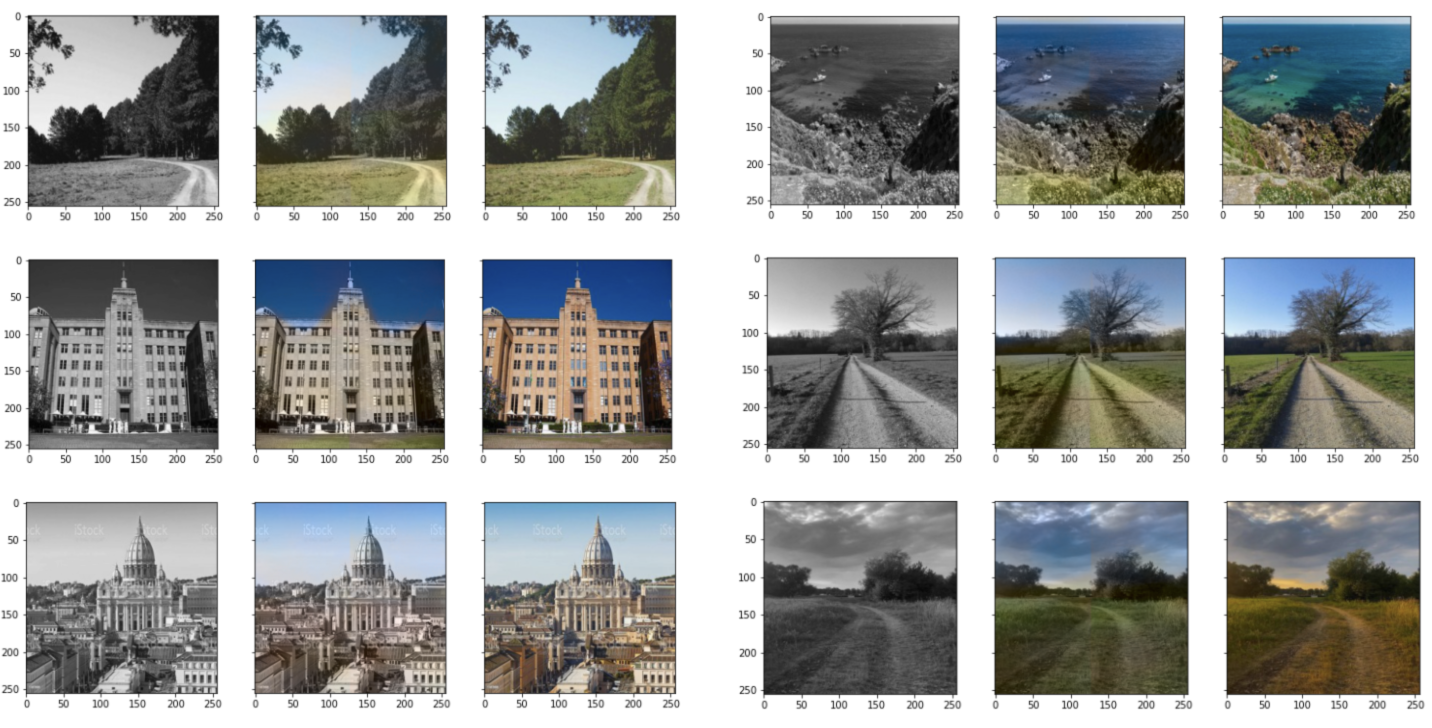

# Conclusion

Image colorization in computer vision is a regression problem to predict color pixel values given the greyscale images. Researchers pay great attention to this problem in recent years and various machine learning models produce promising results. For this final project, I collect landscape images and apply CNN, autoencoder and Unet to color images. While CNN and autoencoder have limited ability to understand the images and apply reasonable colors, Unet with ResNet backbone produce images more indistinguishable from real color photos. 

# Reference


1. R. Zhang, P. Isola, and A. A. Efros, “Colorful image colorization,” in 
European conference on computer vision. Springer, 2016, pp. 649–666.
2. Baldassarre, Federico, Diego González Morín, and Lucas Rodés-Guirao. "Deep koalarization: Image colorization using cnns and inception-resnet-v2." arXiv preprint arXiv:1712.03400 (2017).
3. Wu, Min, et al. "Remote sensing image colorization using symmetrical multi-scale DCGAN in YUV color space." The Visual Computer 37.7 (2021): 1707-1729.
4. Anwar, Saeed, et al. "Image colorization: A survey and dataset." arXiv preprint arXiv:2008.10774 (2020).
5. https://www.kaggle.com/datasets/jehanbhathena/weather-dataset
6. https://www.kaggle.com/datasets/andreybeyn/qudata-gembed-landmarks-210
7. https://www.kaggle.com/datasets/arnaud58/landscape-pictures
8. https://paperswithcode.com/method/autoencoder

